In [ ]:

!unzip "/content/drive/MyDrive/Colab_Notebooks/yolov12/dataset1.zip" -d "/content/drive/MyDrive/Colab_Notebooks/yolov12/datasets"


Archive:  /content/drive/MyDrive/Colab_Notebooks/yolov12/dataset1.zip
  inflating: /content/drive/MyDrive/Colab_Notebooks/yolov12/datasets/annotations/Cars0.xml  
  inflating: /content/drive/MyDrive/Colab_Notebooks/yolov12/datasets/annotations/Cars1.xml  
  inflating: /content/drive/MyDrive/Colab_Notebooks/yolov12/datasets/annotations/Cars10.xml  
  inflating: /content/drive/MyDrive/Colab_Notebooks/yolov12/datasets/annotations/Cars100.xml  
  inflating: /content/drive/MyDrive/Colab_Notebooks/yolov12/datasets/annotations/Cars101.xml  
  inflating: /content/drive/MyDrive/Colab_Notebooks/yolov12/datasets/annotations/Cars102.xml  
  inflating: /content/drive/MyDrive/Colab_Notebooks/yolov12/datasets/annotations/Cars103.xml  
  inflating: /content/drive/MyDrive/Colab_Notebooks/yolov12/datasets/annotations/Cars104.xml  
  inflating: /content/drive/MyDrive/Colab_Notebooks/yolov12/datasets/annotations/Cars105.xml  
  inflating: /content/drive/MyDrive/Colab_Notebooks/yolov12/datasets/annotations

In [ ]:
import os
import xml.etree.ElementTree as ET
from sklearn.model_selection import train_test_split
import shutil

# Базовые пути
BASE_DIR = "/content/drive/MyDrive/Colab_Notebooks/yolov12/datasets"
IMG_DIR = f"{BASE_DIR}/images"
ANN_DIR = f"{BASE_DIR}/annotations"
YOLO_LABEL_DIR = f"{BASE_DIR}/labels"

# Создаем подпапки
for split in ["train", "val"]:
    os.makedirs(f"{BASE_DIR}/images/{split}", exist_ok=True)
    os.makedirs(f"{BASE_DIR}/labels/{split}", exist_ok=True)

# Получаем список всех XML
xml_files = [f for f in os.listdir(ANN_DIR) if f.endswith('.xml')]
train_xmls, val_xmls = train_test_split(xml_files, test_size=0.2, random_state=42)

def convert(xml_list, split):
    for xml_file in xml_list:
        tree = ET.parse(os.path.join(ANN_DIR, xml_file))
        root = tree.getroot()

        img_name = root.find("filename").text
        width = int(root.find("size/width").text)
        height = int(root.find("size/height").text)

        yolo_lines = []
        for obj in root.findall("object"):
            bbox = obj.find("bndbox")
            xmin = int(bbox.find("xmin").text)
            ymin = int(bbox.find("ymin").text)
            xmax = int(bbox.find("xmax").text)
            ymax = int(bbox.find("ymax").text)

            # YOLO format: class x_center y_center width height (все нормализовано)
            x_center = ((xmin + xmax) / 2) / width
            y_center = ((ymin + ymax) / 2) / height
            w = (xmax - xmin) / width
            h = (ymax - ymin) / height

            yolo_lines.append(f"0 {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}")

        # Сохраняем .txt файл
        label_path = f"{BASE_DIR}/labels/{split}/{xml_file.replace('.xml', '.txt')}"
        with open(label_path, "w") as f:
            f.write("\n".join(yolo_lines))

        # Копируем изображение
        img_path = os.path.join(IMG_DIR, img_name)
        dst_path = f"{BASE_DIR}/images/{split}/{img_name}"
        if os.path.exists(img_path):
            shutil.copy(img_path, dst_path)

# Выполняем конвертацию
convert(train_xmls, "train")
convert(val_xmls, "val")


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
!pip install pytesseract pillow opencv-python

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo12n.pt")

results = model.train(
    data="/content/drive/MyDrive/Colab_Notebooks/yolov12/datasets/data.yaml",
    epochs=50,
    imgsz=640,
    batch=8,
    device=0,
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.34M/5.34M [00:00<00:00, 84.4MB/s]


Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Colab_Notebooks/yolov12/datasets/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, 

100%|██████████| 755k/755k [00:00<00:00, 21.3MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  2    180864  ultralytics.nn.modules.block.A2C2f           [128, 128, 2, True, 4]        
  7                  -1  1    295424  ultralytics

 20                  -1  1    378880  ultralytics.nn.modules.block.C3k2            [384, 256, 1, True]           
 21        [14, 17, 20]  1    430867  ultralytics.nn.modules.head.Detect           [1, [64, 128, 256]]           
YOLOv12n summary: 272 layers, 2,568,243 parameters, 2,568,227 gradients, 6.5 GFLOPs

Transferred 640/691 items from pretrained weights
Freezing layer 'model.21.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 109MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.2 ms, read: 1.2±0.6 MB/s, size: 593.7 KB)


train: Scanning /content/drive/MyDrive/Colab_Notebooks/yolov12/datasets/labels/train.cache... 346 images, 0 backgrounds, 0 corrupt: 100%|██████████| 346/346 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 1.5±1.1 MB/s, size: 472.7 KB)


val: Scanning /content/drive/MyDrive/Colab_Notebooks/yolov12/datasets/labels/val.cache... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.77G      1.601      3.011      1.344          6        640: 100%|██████████| 44/44 [00:17<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.79s/it]

                   all         87         94     0.0031      0.862     0.0668     0.0237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.97G      1.629      2.233      1.391          2        640: 100%|██████████| 44/44 [00:13<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.35it/s]

                   all         87         94      0.685     0.0236      0.155     0.0779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.98G      1.712      2.148      1.462          3        640: 100%|██████████| 44/44 [00:12<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.59it/s]

                   all         87         94      0.551        0.3      0.285      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         2G      1.709      2.014      1.451          3        640: 100%|██████████| 44/44 [00:14<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.44it/s]

                   all         87         94      0.125     0.0851     0.0244    0.00901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.01G      1.618      1.821      1.392          4        640: 100%|██████████| 44/44 [00:12<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.62it/s]

                   all         87         94      0.628      0.298      0.346      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.03G        1.6      1.762       1.43          4        640: 100%|██████████| 44/44 [00:12<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.01it/s]

                   all         87         94       0.71      0.617      0.651      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.03G      1.577      1.593      1.383          4        640: 100%|██████████| 44/44 [00:12<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.40it/s]

                   all         87         94      0.663      0.628      0.608        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.03G      1.564      1.534      1.394          7        640: 100%|██████████| 44/44 [00:12<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.74it/s]


                   all         87         94      0.849      0.715      0.797      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.04G      1.527      1.392      1.385          7        640: 100%|██████████| 44/44 [00:12<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.54it/s]

                   all         87         94      0.809       0.84      0.819      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.04G      1.608      1.418      1.411          1        640: 100%|██████████| 44/44 [00:12<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.36it/s]

                   all         87         94      0.615      0.468      0.483      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.04G      1.501      1.324      1.322          5        640: 100%|██████████| 44/44 [00:12<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.71it/s]

                   all         87         94       0.67       0.67      0.605      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.04G      1.478      1.253      1.349          3        640: 100%|██████████| 44/44 [00:12<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.32it/s]

                   all         87         94      0.854      0.649      0.731       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.04G      1.449      1.209       1.31          5        640: 100%|██████████| 44/44 [00:12<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.62it/s]

                   all         87         94      0.817      0.809      0.812      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.04G      1.468      1.172      1.322          5        640: 100%|██████████| 44/44 [00:12<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.92it/s]


                   all         87         94      0.878      0.809      0.882       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.04G      1.431      1.144      1.297          4        640: 100%|██████████| 44/44 [00:12<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.51it/s]

                   all         87         94      0.889      0.766      0.835      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.04G      1.443      1.116      1.324          1        640: 100%|██████████| 44/44 [00:12<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.84it/s]

                   all         87         94       0.87      0.723      0.863      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.04G      1.437      1.083      1.265          6        640: 100%|██████████| 44/44 [00:11<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.74it/s]

                   all         87         94      0.882      0.871      0.911      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.04G       1.42       1.06      1.285          2        640: 100%|██████████| 44/44 [00:12<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.08it/s]

                   all         87         94      0.868      0.836      0.881      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.04G      1.406      1.034      1.288          4        640: 100%|██████████| 44/44 [00:11<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.59it/s]

                   all         87         94      0.855      0.816       0.85      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.04G      1.402      1.026      1.254          5        640: 100%|██████████| 44/44 [00:11<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.23it/s]

                   all         87         94       0.91      0.904      0.912      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.04G      1.373      1.003      1.226          3        640: 100%|██████████| 44/44 [00:11<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.88it/s]

                   all         87         94       0.83      0.862      0.888      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.05G      1.331     0.9652      1.224          3        640: 100%|██████████| 44/44 [00:12<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.75it/s]

                   all         87         94      0.921      0.713      0.854      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.05G      1.355      1.001      1.236          4        640: 100%|██████████| 44/44 [00:11<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.77it/s]


                   all         87         94      0.863       0.84      0.877      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.05G      1.328     0.9057      1.241          5        640: 100%|██████████| 44/44 [00:11<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.55it/s]

                   all         87         94      0.858      0.872      0.891      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.05G      1.408      0.951      1.253          6        640: 100%|██████████| 44/44 [00:11<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.58it/s]

                   all         87         94      0.901      0.874      0.933      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.05G      1.302     0.9132      1.226          3        640: 100%|██████████| 44/44 [00:11<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]

                   all         87         94      0.943      0.877      0.931      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.05G      1.292     0.9137      1.217          6        640: 100%|██████████| 44/44 [00:11<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.64it/s]

                   all         87         94       0.91      0.866      0.904      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.05G      1.326     0.8909      1.227          3        640: 100%|██████████| 44/44 [00:11<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.36it/s]

                   all         87         94      0.892      0.894       0.89      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.05G      1.259     0.9096      1.206          4        640: 100%|██████████| 44/44 [00:11<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]

                   all         87         94      0.887      0.851      0.916       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.05G      1.278     0.8868      1.193          6        640: 100%|██████████| 44/44 [00:11<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]

                   all         87         94      0.914      0.851      0.904      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.05G       1.25     0.8832        1.2          3        640: 100%|██████████| 44/44 [00:11<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]

                   all         87         94      0.867      0.831      0.876      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.05G      1.292     0.8438      1.192          3        640: 100%|██████████| 44/44 [00:11<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.31it/s]

                   all         87         94      0.861      0.859      0.911      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.05G      1.196     0.8238      1.153          4        640: 100%|██████████| 44/44 [00:11<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.18it/s]

                   all         87         94      0.926       0.84      0.937      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.05G      1.205     0.8013      1.156          7        640: 100%|██████████| 44/44 [00:11<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.70it/s]

                   all         87         94      0.908      0.842      0.933       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.05G      1.251     0.8342      1.184          4        640: 100%|██████████| 44/44 [00:11<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]

                   all         87         94      0.881      0.864      0.915      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.05G       1.22     0.8184      1.164          9        640: 100%|██████████| 44/44 [00:11<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.14it/s]

                   all         87         94      0.922      0.883      0.935      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.05G      1.211     0.7718      1.183          3        640: 100%|██████████| 44/44 [00:11<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.59it/s]


                   all         87         94      0.923      0.897      0.932      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.05G      1.169     0.7627      1.146          4        640: 100%|██████████| 44/44 [00:11<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]

                   all         87         94      0.903       0.89      0.931      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.05G      1.126     0.7401      1.125          4        640: 100%|██████████| 44/44 [00:11<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.16it/s]

                   all         87         94      0.911      0.874      0.928      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.05G      1.186     0.7741      1.139          5        640: 100%|██████████| 44/44 [00:11<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.63it/s]

                   all         87         94      0.898      0.862      0.913      0.528


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.05G      1.166     0.7419      1.154          2        640: 100%|██████████| 44/44 [00:13<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.18it/s]

                   all         87         94      0.904      0.905      0.916      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.05G      1.146     0.7115       1.15          2        640: 100%|██████████| 44/44 [00:12<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.72it/s]

                   all         87         94      0.914      0.894      0.919      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.05G      1.132     0.7072      1.137          2        640: 100%|██████████| 44/44 [00:12<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.69it/s]

                   all         87         94      0.944      0.893      0.929      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.05G      1.101     0.6773      1.092          2        640: 100%|██████████| 44/44 [00:12<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.76it/s]

                   all         87         94       0.92      0.862      0.914       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.05G      1.043       0.65      1.098          2        640: 100%|██████████| 44/44 [00:12<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.70it/s]

                   all         87         94      0.897      0.872        0.9      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.05G      1.109     0.6653      1.115          2        640: 100%|██████████| 44/44 [00:12<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.10it/s]

                   all         87         94      0.944      0.899      0.944      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.05G      1.053     0.6507      1.085          2        640: 100%|██████████| 44/44 [00:12<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.75it/s]

                   all         87         94      0.914      0.901      0.933      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.05G      1.061     0.6398      1.098          2        640: 100%|██████████| 44/44 [00:12<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.13it/s]

                   all         87         94      0.923      0.889      0.945      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.05G      1.054     0.6557       1.09          2        640: 100%|██████████| 44/44 [00:12<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.30it/s]

                   all         87         94      0.905      0.894      0.927      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.05G      1.051     0.6348      1.078          2        640: 100%|██████████| 44/44 [00:12<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.36it/s]

                   all         87         94      0.894      0.904       0.93      0.554



50 epochs completed in 0.203 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.84it/s]


                   all         87         94      0.914      0.901      0.932      0.564
Speed: 0.3ms preprocess, 7.4ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/train



0: 640x640 1 licence, 7.6ms
1: 640x640 3 licences, 7.6ms
2: 640x640 1 licence, 7.6ms
3: 640x640 1 licence, 7.6ms
4: 640x640 1 licence, 7.6ms
Speed: 2.8ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


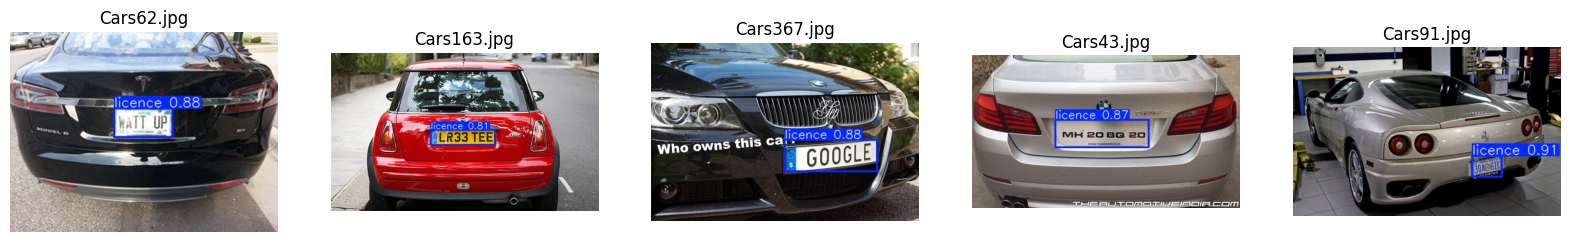

In [ ]:
import random
import os
import cv2
import matplotlib.pyplot as plt

# 1️⃣ Путь к папке с валидационными изображениями
val_dir = "/content/drive/MyDrive/Colab_Notebooks/yolov12/datasets/images/val"

# 2️⃣ Получаем список изображений
images = [os.path.join(val_dir, f) for f in os.listdir(val_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# 3️⃣ Выбираем случайные 5 изображений
sample_images = random.sample(images, 5)

# 4️⃣ Загружаем модель
model = YOLO("/content/runs/detect/train/weights/best.pt")

# 5️⃣ Делаем предсказания на выбранных изображениях
results = model.predict(source=sample_images, save=True)

predict_dir = "runs/detect/predict"

plt.figure(figsize=(20, 10))
for idx, img_name in enumerate(os.listdir(predict_dir)[:5]):
    img_path = os.path.join(predict_dir, img_name)
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, idx + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_name)
plt.show()
